---
# Cairo University Faculty of Engineering
## Machine Learning 
## Assignment 1 

---

Please write your full name here
- **Name** : "Mohamed Ahmed Mohamed Ibrahim"

## Introduction to Machine Learning
For this assignment, you will be using the Breast Cancer Wisconsin (Diagnostic) Database to create a classifier that can help diagnose patients. First, read through the description of the dataset (below).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

#print(cancer.DESCR) # Print the data set description

The object returned by `load_breast_cancer()` is a scikit-learn Bunch object, which is similar to a dictionary.

In [2]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
print(cancer.feature_names, "\n")
print(len(cancer.feature_names))

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'] 

30


### Question 0

How many features does the breast cancer dataset have?

*This function should return an integer.*

In [4]:
def answer_zero():
    num_features = len(cancer.feature_names)
    return num_features

### Question 1
Pandas dataframes are much easier and more interpretable when dealing with tables. **Convert the cancer data into dataframe.**

Note: Scikit-learn works with lists, numpy arrays, scipy-sparse matrices, and pandas DataFrames, so converting the dataset to a DataFrame is not necessary for training any model.

*This function should return a (569, 31) DataFrame with *

*columns = *

    ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
    'mean smoothness', 'mean compactness', 'mean concavity',
    'mean concave points', 'mean symmetry', 'mean fractal dimension',
    'radius error', 'texture error', 'perimeter error', 'area error',
    'smoothness error', 'compactness error', 'concavity error',
    'concave points error', 'symmetry error', 'fractal dimension error',
    'worst radius', 'worst texture', 'worst perimeter', 'worst area',
    'worst smoothness', 'worst compactness', 'worst concavity',
    'worst concave points', 'worst symmetry', 'worst fractal dimension',
    'target']
    
*and index = *

RangeIndex(start=0, stop=569, step=1)

In [5]:
def answer_one():
    cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
    cancer_df["target"] = cancer.target
    return cancer_df


answer_one()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
0                  0.2654          0.4601                  0.11890       0  
1                  0.1860          0.2750                  0.08902       0  
2                  0.2430          0.3613                  0.08758       0  
3                  0.2575          0.6638                  0.17300       0  
4                  0.1625          0.2364                  0.076

### Question 2
What is the class distribution? (i.e. how many instances of `malignant` and how many `benign`?)

[(357, 'malignant'), (212, 'benign')]

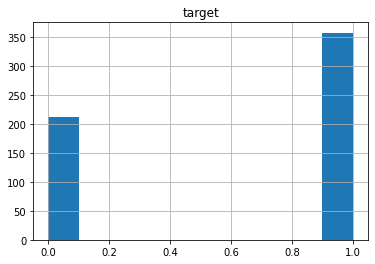

In [6]:
def answer_two():
    cancerdf = answer_one() 
    malignant, benign = cancerdf["target"].value_counts()
    class_distribution = list(zip(cancerdf["target"].value_counts(), cancer.target_names))
    cancerdf.hist(column='target')
    return class_distribution

answer_two()

### Question 3
Split the DataFrame into `X` (the data) and `y` (the labels).

In [7]:
def answer_three():
    cancerdf = answer_one()
    X = cancerdf.drop("target", axis=1)
    y = cancerdf["target"]
    return X, y

answer_three()

(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  mean conca

### Question 4
Using `train_test_split`, split `X` and `y` into training and test sets

In [8]:
from sklearn.model_selection import train_test_split

def answer_four():
    X, y = answer_three()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
    # Your code here
    
    return X_train, X_test, y_train, y_test

answer_four()

(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 342        11.06         14.96           71.49      373.9          0.10330   
 138        14.95         17.57           96.85      678.1          0.11670   
 434        14.86         16.94           94.89      673.7          0.08924   
 47         13.17         18.66           85.98      534.6          0.11580   
 64         12.68         23.84           82.69      499.0          0.11220   
 ..           ...           ...             ...        ...              ...   
 456        11.63         29.29           74.87      415.1          0.09357   
 360        12.54         18.07           79.42      491.9          0.07436   
 439        14.02         15.66           89.59      606.5          0.07966   
 174        10.66         15.15           67.49      349.6          0.08792   
 122        24.25         20.20          166.20     1761.0          0.14470   
 
      mean compactness  mean concavity  mean conca

### Question 5
Using KNeighborsClassifier, fit a k-nearest neighbors (knn) classifier with `X_train`, `y_train`.

In [9]:
from sklearn.neighbors import KNeighborsClassifier

def answer_five():
    X_train, X_test, y_train, y_test = answer_four()
    X_train = X_train.values
    y_train = np.ravel(y_train.to_numpy())
    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(X_train, y_train)
    
    return model

answer_five()

KNeighborsClassifier(n_neighbors=3)

### Question 6
Using your knn classifier, predict the class label using the median value for each feature.

In [10]:
def answer_six():
    cancerdf = answer_one()    
    X_train, X_test, y_train, y_test = answer_four()
    X_train = X_train.median(axis=0).to_numpy().reshape(1, -1)

    model = answer_five()
    label = cancer.target_names[model.predict(X_train)[0]]
    return label

answer_six()

'benign'

### Question 7
Using your knn classifier, predict the class labels for the test set `X_test`.

In [11]:
def answer_seven():
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()
    
    X_test = X_test.values
    model = answer_five()
    
    predictions = model.predict(X_test)
    return predictions

answer_seven()

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1])

### Question 8
Find the score (accuracy) of your knn classifier using `X_test` and `y_test` & `X_train` and `y_train`. 
- Is the training accuracy higher or lower that the testing accuracy? 
- According to the test accuracy, would this model generalize well to new inputs?

In [12]:
def answer_eight():
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()

    X_train = X_train.values
    y_train = np.ravel(y_train.to_numpy())
    
    X_test = X_test.values
    y_test = np.ravel(y_test.to_numpy())

    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    
    return train_score, test_score

answer_eight()

(0.9604395604395605, 0.8771929824561403)

#### Yes Training accuracy is larger than test accuracy
#### No I won't generalize well as there is variance problem here (train acc >> test acc)

### Question 9
##### Accuracy Plot
* Create `mal_train_X`, `mal_train_y`,`ben_train_X`,`ben_train_y`, `mal_test_X`,`mal_test_y`, `ben_test_X` and `ben_test_y` portions of the dataset. Where `mal_train_X` contains all training samples that belongs to malignant class while `mal_train_y` contains all labels of the samples that belongs to malignant class, and so on for other variables.

* Calculate Accuracy scores for each case and save all the results in a list called `scores` using knn model from question 5.

Try using the plotting function below to visualize the differet predicition scores between training and test sets, as well as malignant and benign cells.

In [13]:
def accuracy_plot():
    import matplotlib.pyplot as plt

    %matplotlib notebook

    X_train, X_test, y_train, y_test = answer_four()
    cancerdf = answer_one()
    # Find the training and testing accuracies by target value (i.e. malignant, benign)
    
    # #################################################################################
    # ###################### Write your code here #####################################
    # #################################################################################
    
    mal_train_X = X_train[y_train==0].values
    mal_train_y = y_train[y_train==0].values
    
    ben_train_X = X_train[y_train==1].values
    ben_train_y = y_train[y_train==1].values

    mal_test_X = X_test[y_test==0].values
    mal_test_y = y_test[y_test==0].values
    
    ben_test_X = X_test[y_test==1].values
    ben_test_y = y_test[y_test==1].values
    
    data_portions = [(mal_train_X, mal_train_y), (ben_train_X, ben_train_y), 
                     (mal_test_X, mal_test_y), (ben_test_X, ben_test_y)]
    
    knn = answer_five()
    scores = [50,50,50,50]
    for i, portion in enumerate(data_portions):
        scores[i] = knn.score(portion[0], portion[1])

    plt.figure()

    # Plot the scores as a bar chart
    bars = plt.bar(np.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])

    # directly label the score onto the bars
    for bar in bars:
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2), 
                     ha='center', color='w', fontsize=11)

    # remove all the ticks (both axes), and tick labels on the Y axis
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

    # remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8);
    plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)

<IPython.core.display.Javascript object>


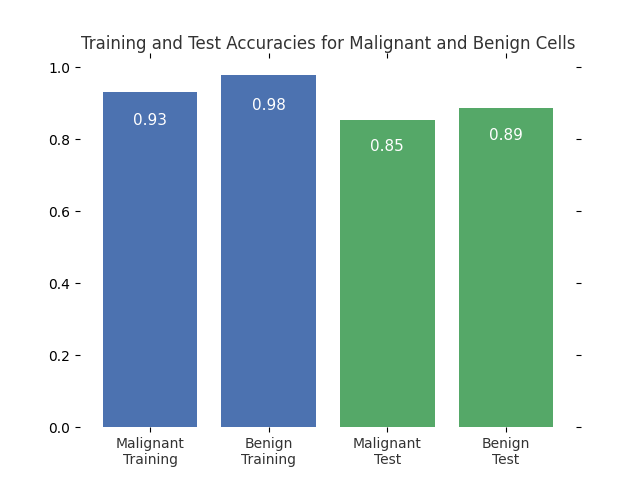

In [14]:
accuracy_plot() 

### Question 10
1. Load Iris dataset from sklearn.
2. Split the data into training and testing (30% testing)
3. Create scatter plot.
4. From the scatter plot choose two features only to train a knn model with suitable "k" of your choice.
5. Evaluate your model performance and comment on your results.

In [23]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris() 
iris_train, iris_test, lables_train, lables_test = train_test_split(
    StandardScaler().fit_transform(iris.data), iris.target, random_state=4, test_size=0.3
)

<IPython.core.display.Javascript object>


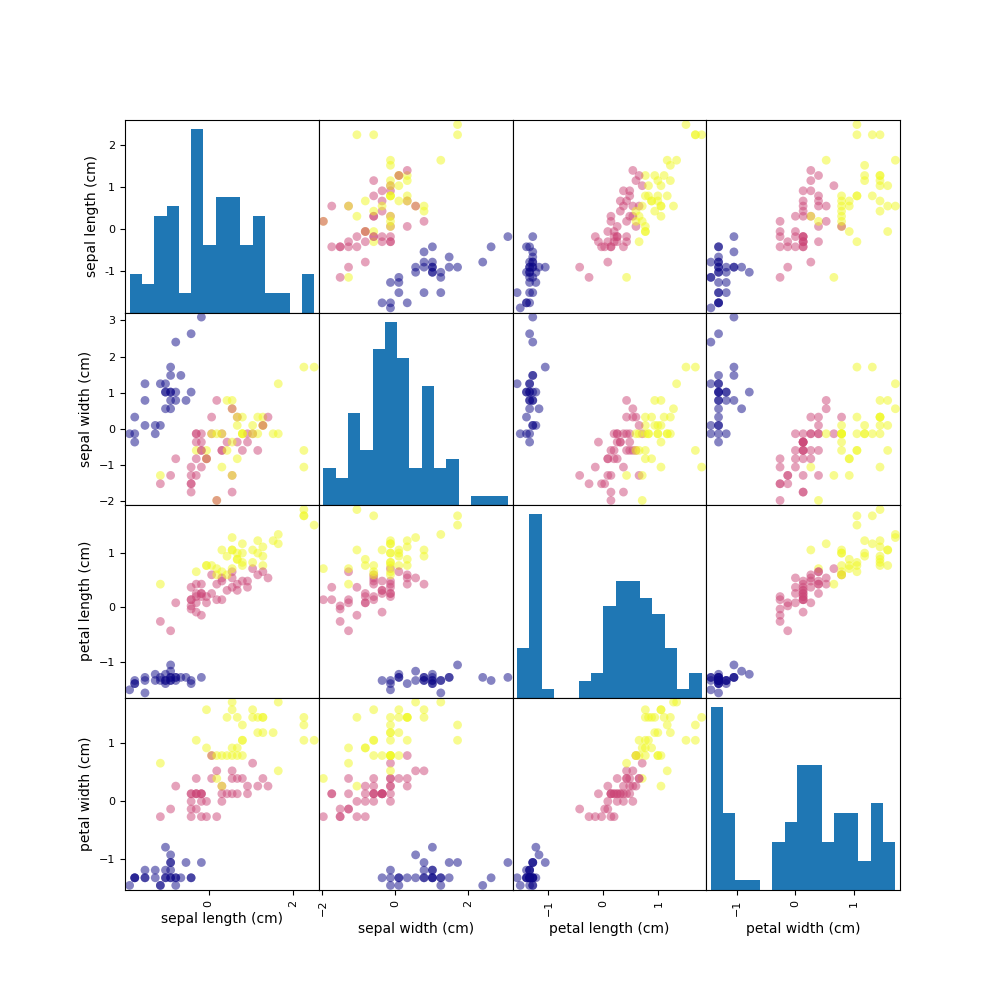

In [24]:
from matplotlib import cm

iris = datasets.load_iris() 
iris_train_df = pd.DataFrame(data=iris_train, columns=iris.feature_names)
iris_test_df = pd.DataFrame(data=iris_test, columns=iris.feature_names)

cmap = cm.get_cmap('plasma')
scatter = pd.plotting.scatter_matrix(iris_train_df, c= lables_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(10,10), cmap=cmap)

#### Choosing `petal width (cm)` `sepal width (cm)` features (selected visually)

In [25]:
sub_iris_train = iris_train_df[["petal length (cm)", "petal width (cm)"]]
iris_model = KNeighborsClassifier(n_neighbors=5)

iris_model.fit(sub_iris_train, lables_train)

KNeighborsClassifier()

In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from IPython.display import display_html, display

iris_test_df
sub_iris_test = iris_test_df[["petal length (cm)", "petal width (cm)"]]

def clf_report(clf, data):
    clf_name, classifier = clf
    inputs, lables = data
    predictions = classifier.predict(inputs)
    report = classification_report(lables, predictions, output_dict=True, target_names = iris.target_names)
    return (clf_name, report)

def display_report(dfs, names=[]):
    for i in range(0, len(names)):
        display_html(f'<h4 style="color:red;">{names[i]}</h4>', raw=True)
        display(dfs[i])

def print_report(report):
    (clf_name, train_report),(_,test_report) = report
    display_html(f'<h3>{clf_name}</h3>', raw=True)
    train_report_df = pd.DataFrame.from_dict(train_report)
    test_report_df = pd.DataFrame.from_dict(test_report)
    display_report([train_report_df, test_report_df], ["Trian","Test"])


In [27]:
train_report = clf_report(("KNN", iris_model), (sub_iris_train, lables_train))
test_report = clf_report(("KNN", iris_model), (sub_iris_test, lables_test))

model_report = (train_report, test_report)

print_report(model_report)

KNN

Trian

setosa  versicolor  virginica  accuracy   macro avg  weighted avg
precision     1.0        0.95   0.944444  0.961905    0.964815      0.961905
recall        1.0        0.95   0.944444  0.961905    0.964815      0.961905
f1-score      1.0        0.95   0.944444  0.961905    0.964815      0.961905
support      29.0       40.00  36.000000  0.961905  105.000000    105.000000

Test

setosa  versicolor  virginica  accuracy  macro avg  weighted avg
precision     1.0    0.909091   1.000000  0.977778   0.969697      0.979798
recall        1.0    1.000000   0.928571  0.977778   0.976190      0.977778
f1-score      1.0    0.952381   0.962963  0.977778   0.971781      0.977895
support      21.0   10.000000  14.000000  0.977778  45.000000     45.000000

### Comments
- The model is very good at classifing setosa when compared to virginica and versicolor\
- The test set may be a little bit easier than training set for setosa and versicolor as the model have a higher f1 score in the test set than the training set.
- Accuracy for both training and testing is very close which indicates that the model have no obvious variance problems